<a href="https://colab.research.google.com/github/sofianatalia/ba780-uber-eats-project/blob/main/BA810_CBSJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [55]:
species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set.csv')

<ipython-input-55-b5c266f8df8f>:1: DtypeWarning: Columns (4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  species = pd.read_csv('/content/gdrive/MyDrive/BA810-GroupProj/learning_set.csv')


In [56]:
species.head(3)

,Unnamed: 0,group,binomial,iucn_id_no,common_name,name_language,iucn_category,iso_a3,total_area,small_range,...,Surface Temperature Change,"Climate related disasters frequency, Number of Disasters: Drought","Climate related disasters frequency, Number of Disasters: Extreme temperature","Climate related disasters frequency, Number of Disasters: Flood","Climate related disasters frequency, Number of Disasters: Landslide","Climate related disasters frequency, Number of Disasters: Storm","Climate related disasters frequency, Number of Disasters: TOTAL","Climate related disasters frequency, Number of Disasters: Wildfire",Population Density,Change in Precipitation
0,0,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,IDN,128005.56,0,...,1.085,NaN,NaN,13.0,NaN,NaN,13.0,NaN,95.4,-58.41
1,1,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,MYS,128005.56,0,...,1.367,NaN,NaN,5.0,1.0,NaN,6.0,NaN,42.03,11.69
2,2,Amphibians,Abavorana luctuosa,125161167.0,Purple Frog,eng,LC,THA,128005.56,0,...,1.014,NaN,NaN,9.0,NaN,2.0,11.0,NaN,122.01,-199.93


In [57]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546953 entries, 0 to 546952
Data columns (total 24 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   Unnamed: 0                                                                     546953 non-null  int64  
 1   group                                                                          546953 non-null  object 
 2   binomial                                                                       546953 non-null  object 
 3   iucn_id_no                                                                     274122 non-null  float64
 4   common_name                                                                    233601 non-null  object 
 5   name_language                                                                  233242 non-null  object 
 6   iucn_categor

In [58]:
species.dropna(subset=['iucn_id_no'], inplace=True)
columns_to_drop = ['common_name','name_language', 'wb_iso', 'Climate related disasters frequency, Number of Disasters: TOTAL']
species = species.drop(columns=columns_to_drop)

In [59]:
species['Surface Temperature Change'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Drought'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Landslide'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Flood'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Storm'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Wildfire'].fillna(0, inplace=True)
species['Climate related disasters frequency, Number of Disasters: Extreme temperature'].fillna(0, inplace=True)
species['Change in Precipitation'].fillna(0, inplace = True)

In [60]:
# Drop rows with iucn_category = 'DD' (Data Deficient)
species = species[species['iucn_category'] != 'DD']

In [61]:
species.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259159 entries, 0 to 546952
Data columns (total 20 columns):
 #   Column                                                                         Non-Null Count   Dtype  
---  ------                                                                         --------------   -----  
 0   Unnamed: 0                                                                     259159 non-null  int64  
 1   group                                                                          259159 non-null  object 
 2   binomial                                                                       259159 non-null  object 
 3   iucn_id_no                                                                     259159 non-null  float64
 4   iucn_category                                                                  259159 non-null  object 
 5   iso_a3                                                                         259159 non-null  object 
 6   total_area  

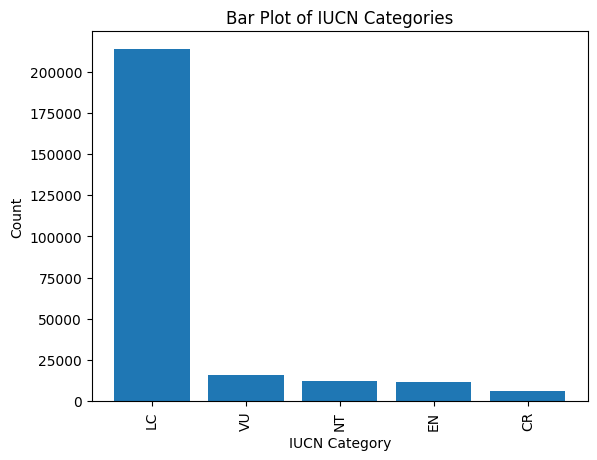

In [62]:
category_counts = species['iucn_category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('IUCN Category')
plt.ylabel('Count')
plt.title('Bar Plot of IUCN Categories')
plt.xticks(rotation=90)
plt.show()

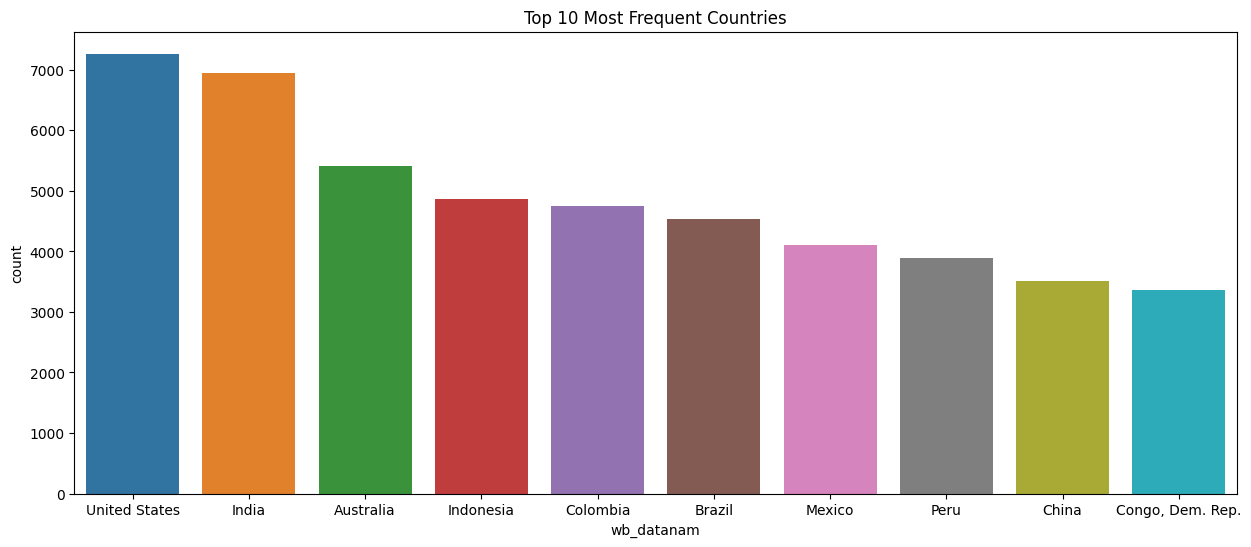

In [63]:
# Get the top 10 most frequent countries in the dataset
top10_countries = species['wb_datanam'].value_counts().head(10)

# Filter the dataset to include only the top 10 countries
top10_data = species[species['wb_datanam'].isin(top10_countries.index)]

# Create a countplot for the top 10 most frequent countries
plt.figure(figsize=(15, 6))
sns.countplot(x='wb_datanam', data=top10_data, order=top10_countries.index)
plt.title('Top 10 Most Frequent Countries')
plt.show()

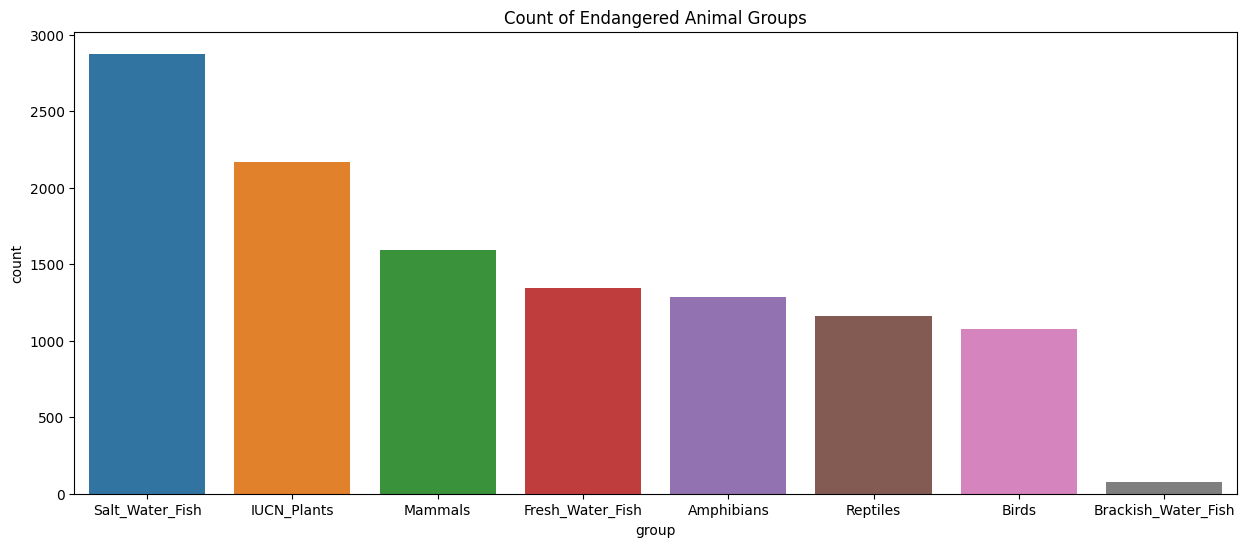

In [64]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Create a countplot for the Endagered animal groups
plt.figure(figsize=(15, 6))
sns.countplot(x='group', data=en_data, order=en_data['group'].value_counts().index)
plt.title('Count of Endangered Animal Groups')
plt.show()

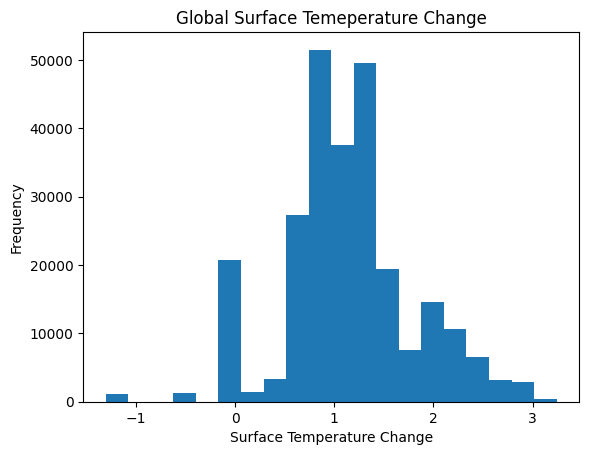

In [65]:
plt.hist(species['Surface Temperature Change'], bins = 20)
plt.xlabel('Surface Temperature Change')
plt.ylabel('Frequency')
plt.title('Global Surface Temeperature Change')
plt.show()

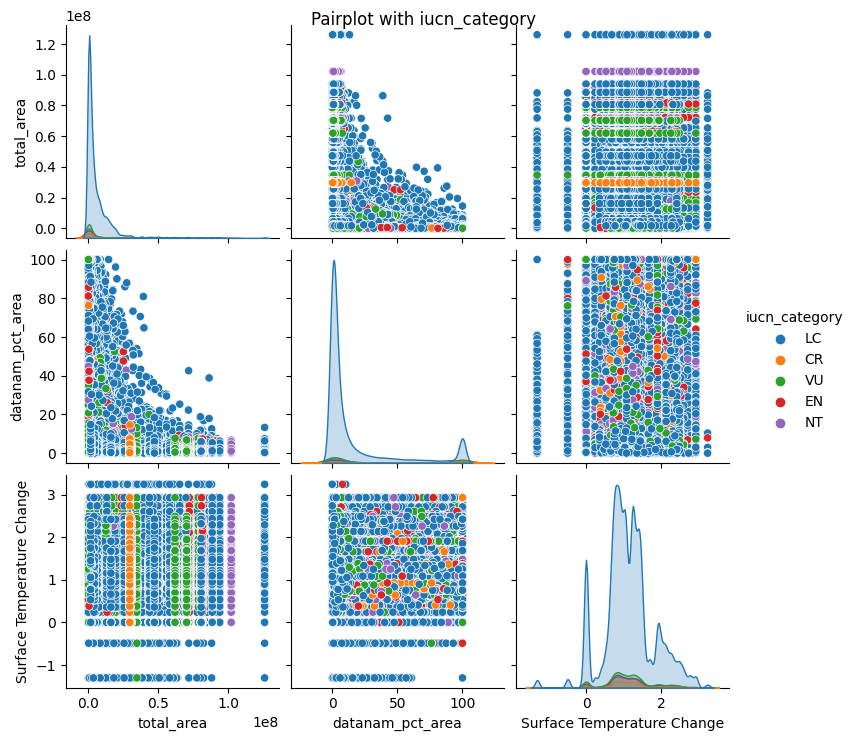

In [66]:
# Select columns for pairplot
columns_for_pairplot = ['iucn_category', 'total_area', 'datanam_pct_area', 'Population Density', 'Change in Precipitation', 'Surface Temperature Change']

# Pairplot with iucn_category
sns.pairplot(species[columns_for_pairplot], hue='iucn_category')
plt.suptitle('Pairplot with iucn_category')
plt.show()

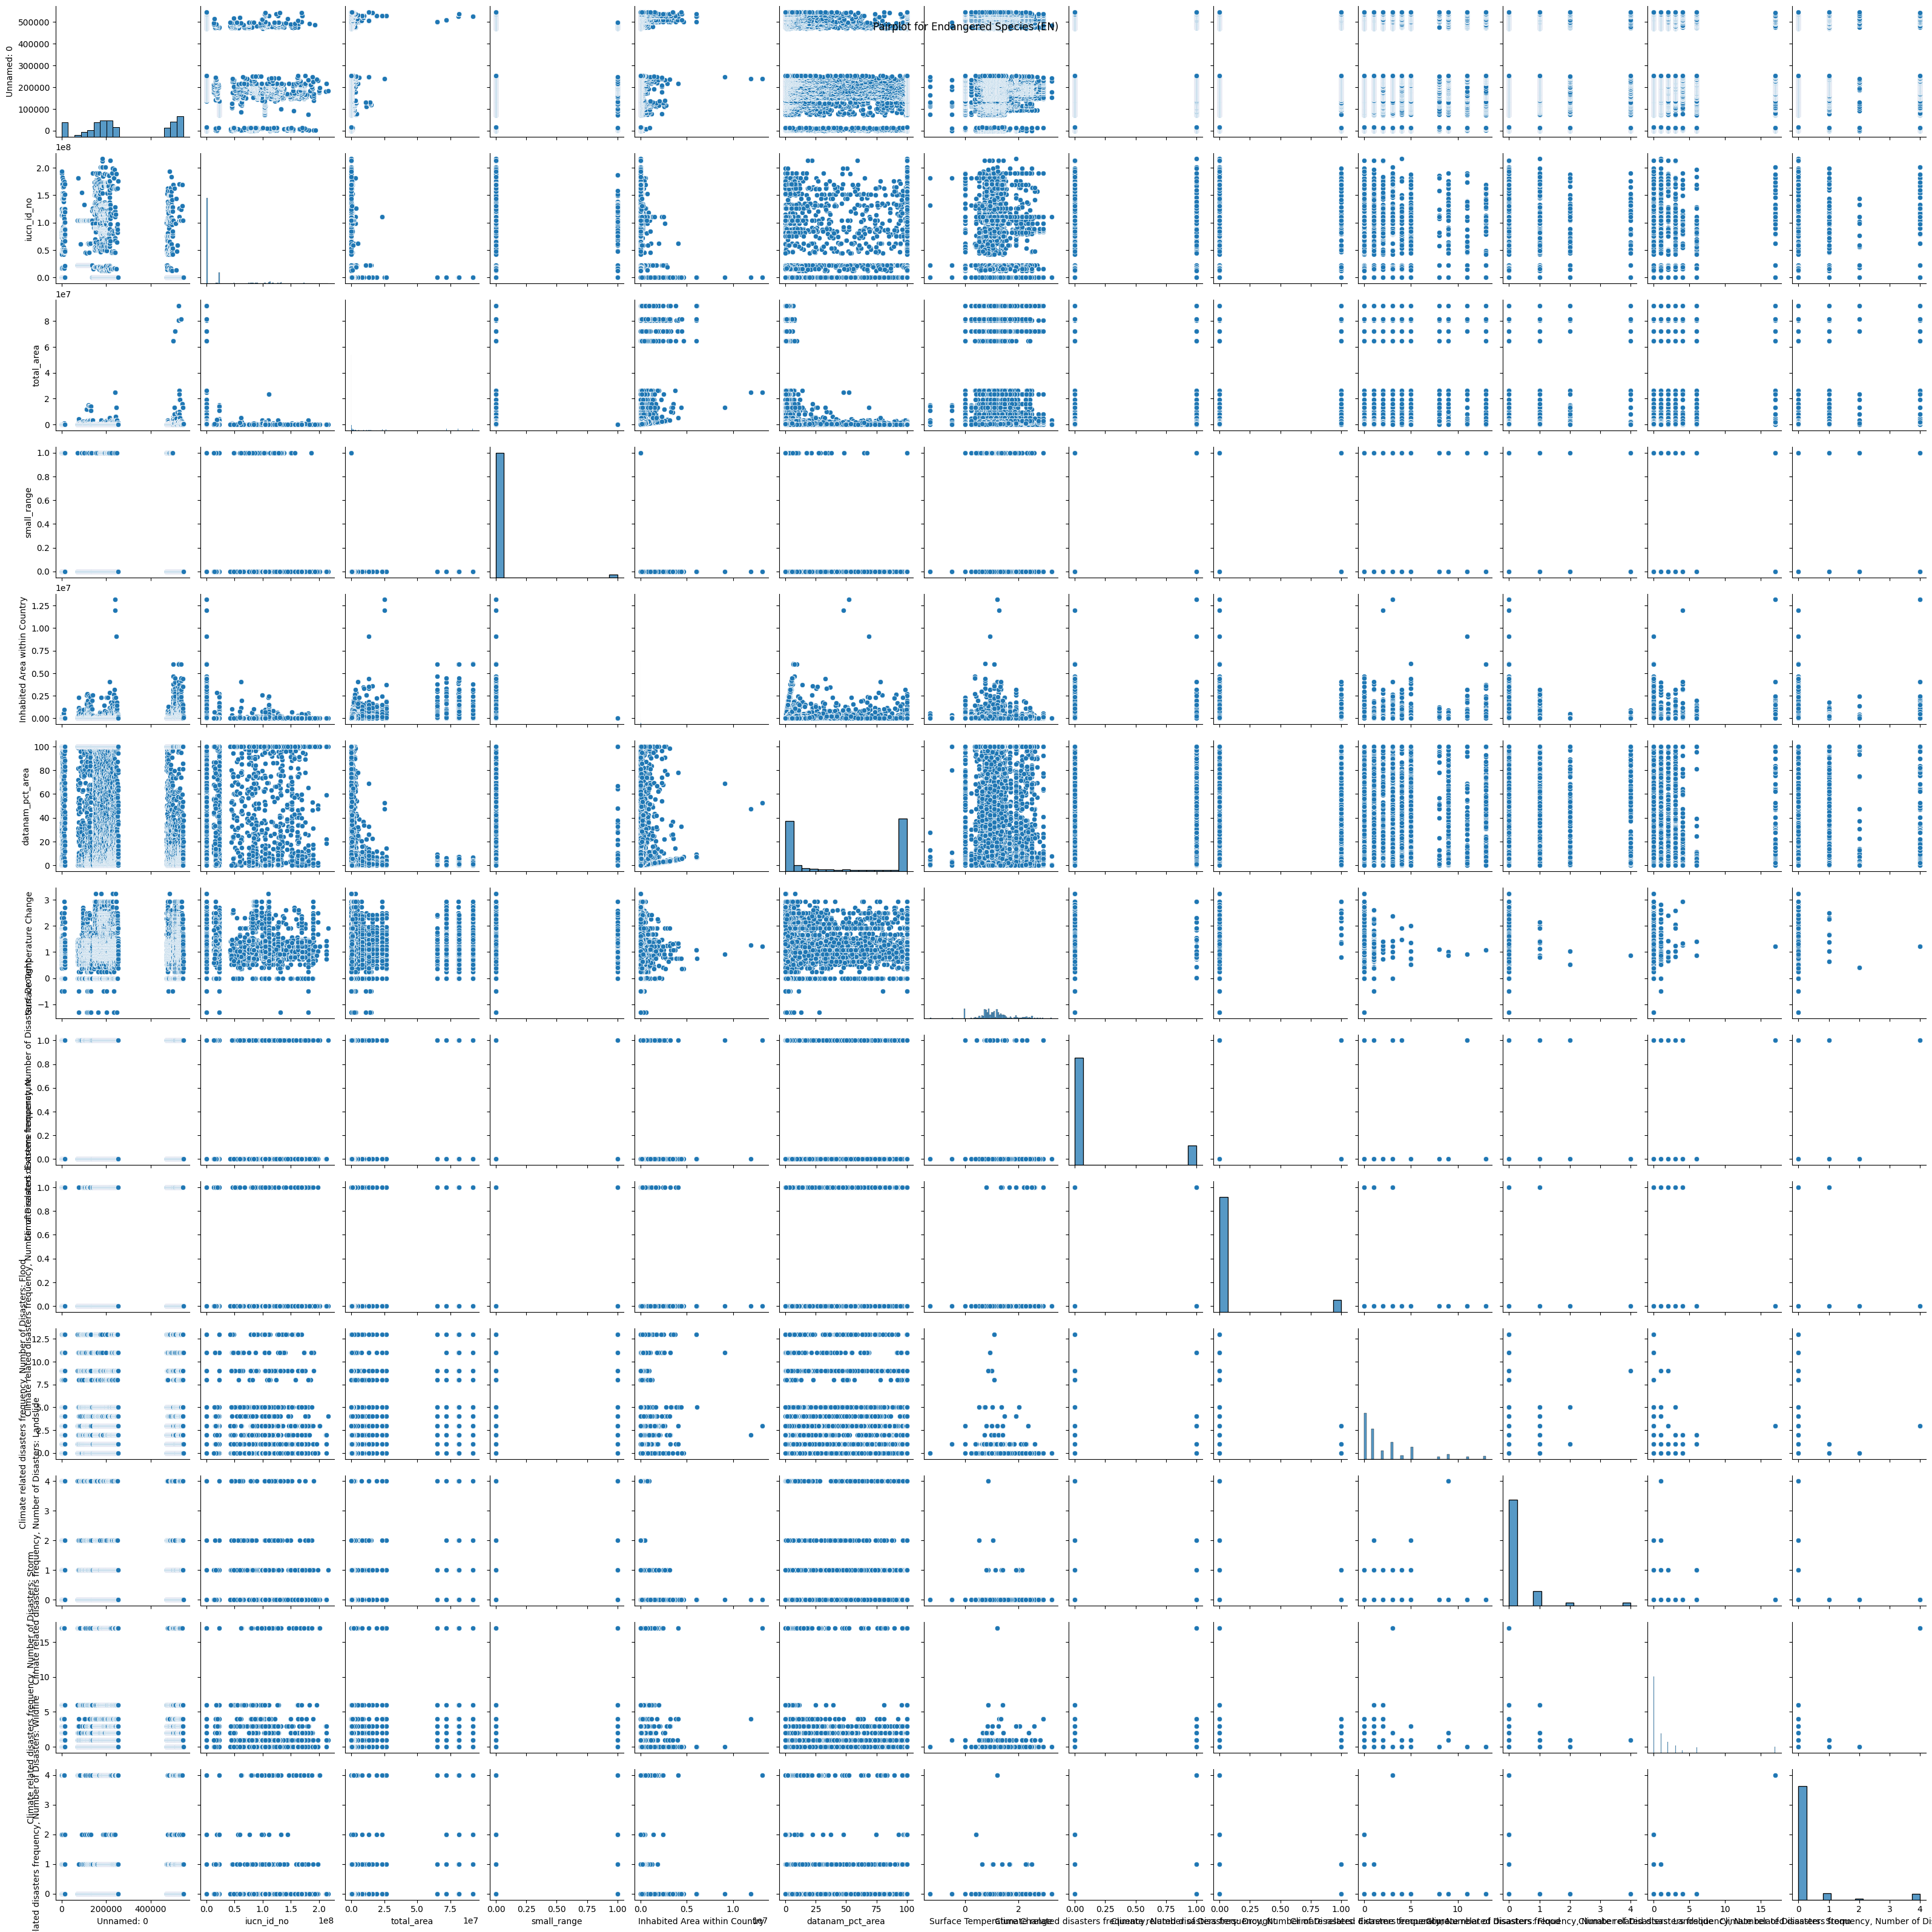

In [67]:
# Filter the dataset for Endangered animals
en_data = species[species['iucn_category'] == 'EN']

# Pairplot for numerical features specifically for 'EN' category
sns.pairplot(en_data)
plt.suptitle('Pairplot for Endangered Species (EN)')
plt.show()